In [43]:
# Let's start by reading the contents of the uploaded file to understand its structure.
import pandas as pd

# Load the file into a DataFrame
file_path = '1_3V.csv'
data = pd.read_csv(file_path)


import matplotlib.pyplot as plt

# Save the original plt.grid function
original_grid = plt.grid

# Define a wrapper function that applies custom grid and tick settings
def grid_proxy(*args, **kwargs):
    # Apply custom grid settings
    kwargs.setdefault('which', 'both')
    kwargs.setdefault('linestyle', '--')
    kwargs.setdefault('linewidth', 0.5)
    
    # Call the original plt.grid function with the updated settings
    original_grid(*args, **kwargs)
    
    # Automatically turn on minor ticks
    plt.minorticks_on()
    
    # Apply custom minor tick parameters
    plt.tick_params(which='minor', length=4, color='r')

# Override plt.grid with the proxy function
plt.grid = grid_proxy

# Display the first few rows of the DataFrame to understand its structure

5e-06

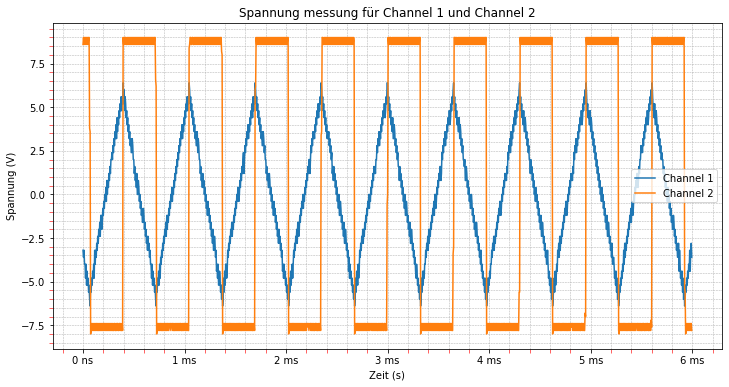

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
# Implementing the provided helper functions for formatting labels

def format_with_unit(value, unit):
    """Format a number and append a unit, removing trailing zeros."""
    formatted_value = '{:1.2f}'.format(value).rstrip('0').rstrip('.')
    return formatted_value + ' ' + unit if formatted_value != '' else '0 ' + unit

def format_freq(x, pos):
    """Format frequency axis with SI unit prefixes."""
    if x >= 1e9:
        return format_with_unit(x * 1e-9, 'G')
    elif x >= 1e6:
        return format_with_unit(x * 1e-6, 'M')
    elif x >= 1e3:
        return format_with_unit(x * 1e-3, 'k')
    else:
        return format_with_unit(x, '')

def format_phase(x, pos):
    """Add degree symbol to phase axis."""
    return '{:1.0f}\u00B0'.format(x)  # \u00B0 is the unicode for degree symbol

def format_time(x, pos):
    """Format time axis with SI unit prefixes."""
    if x >= 1:
        return format_with_unit(x, 's')
    elif x >= 1e-3:
        return format_with_unit(x * 1e3, 'ms')
    elif x >= 1e-6:
        return format_with_unit(x * 1e6, 'µs')
    else:
        return format_with_unit(x * 1e9, 'ns')

# Testing the formatting functions
test_values = [0.000001, 0.001, 1, 1000, 1000000, 1000000000]
test_units = [format_time(value, None) for value in test_values]

test_values, test_units


# Skipping the first row which is header information and parsing the relevant data
data_cleaned = data.iloc[1:].copy()  # Skipping the first row with meta information
data_cleaned['CH1'] = pd.to_numeric(data_cleaned['CH1'], errors='coerce')
data_cleaned['CH2'] = pd.to_numeric(data_cleaned['CH2'], errors='coerce')

# Since the sampling frequency is 600Hz, the time between each sample is 1/600 seconds
#sampling_frequency = 500/3*1000

sampling_interval = data["Increment"][0]#1 / sampling_frequency
total_samples = data_cleaned.shape[0]
time = np.arange(0, total_samples * sampling_interval, sampling_interval)[:total_samples]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, data_cleaned['CH1'], label='Integrator')
plt.plot(time, data_cleaned['CH2'], label='Verstärker')
plt.xlabel('Zeit (s)')
plt.ylabel('Spannung (V)')
plt.title('Spannung messung für Dreieck- Rechteck-VCO')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Minor ticks can be made denser by specifying the number of intervals within the data range
# This is especially useful when the automatic grid does not provide enough detail
min_x = min(time)
max_x = max(time)
min_y = min(min(data_cleaned['CH1']), min(data_cleaned['CH2']))
max_y = max(max(data_cleaned['CH1']), max(data_cleaned['CH2']))

# Setting minor ticks
plt.minorticks_on()
plt.tick_params(which='minor', length=4, color='r')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))

plt.savefig("dreieckrechteck VCO")
plt.show()




In [11]:
76-12

64

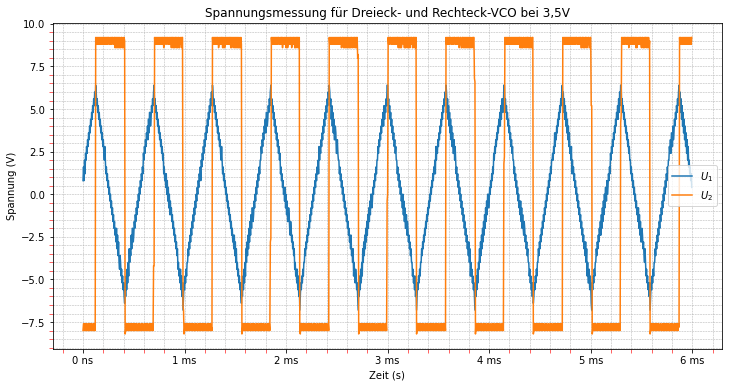

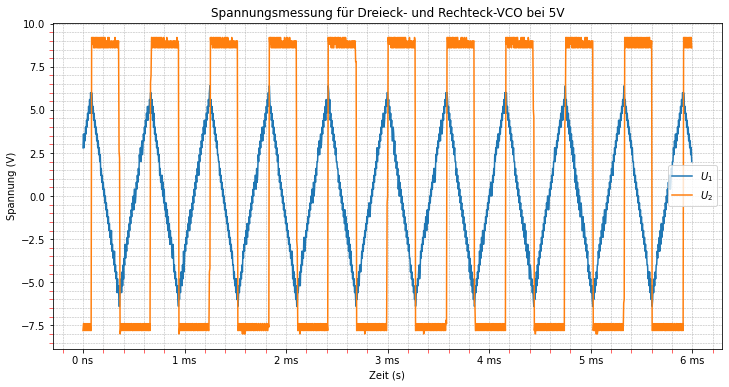

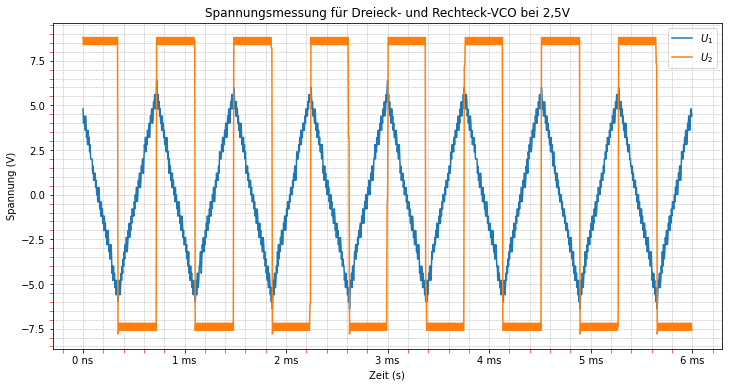

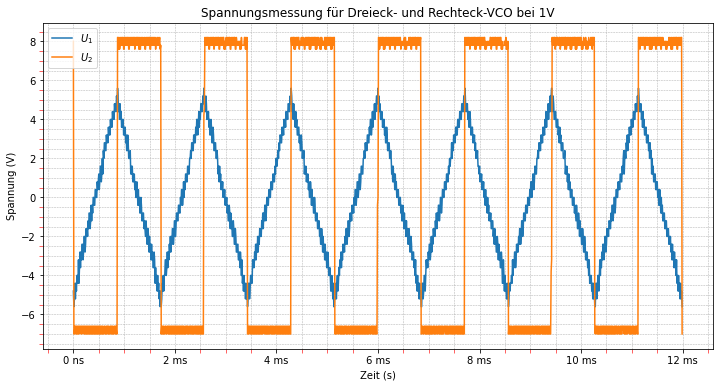

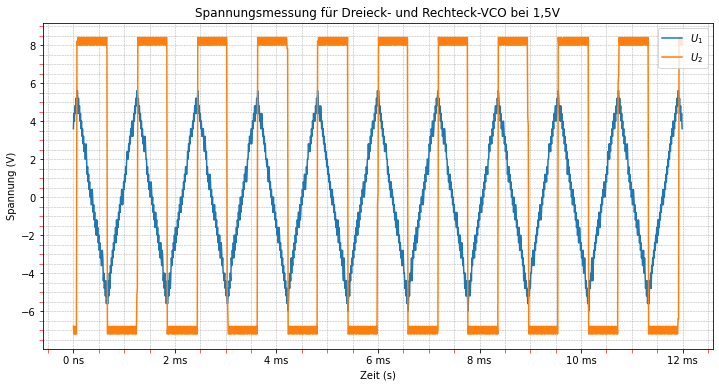

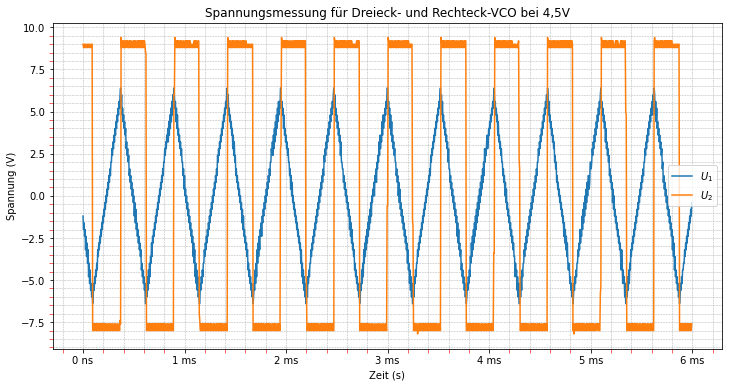

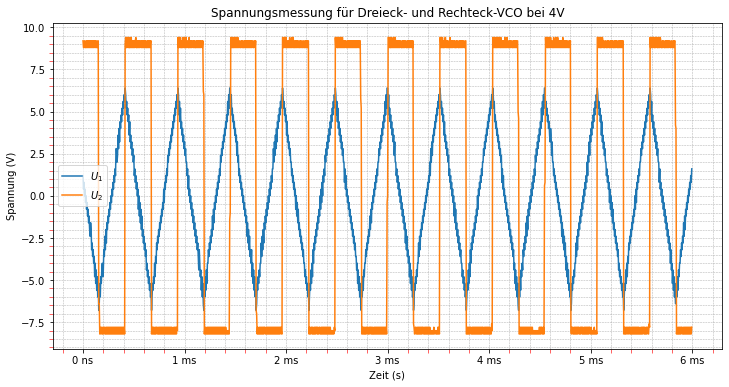

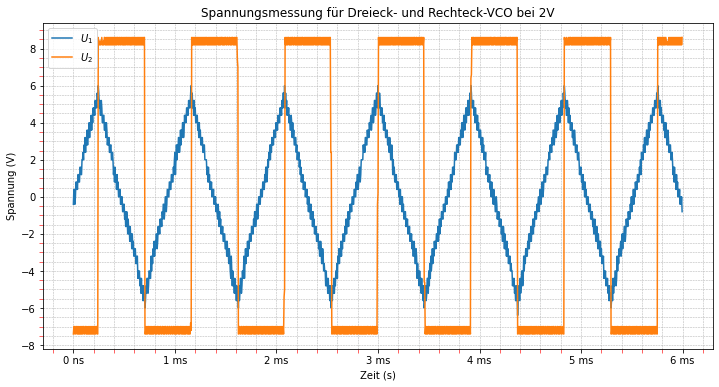

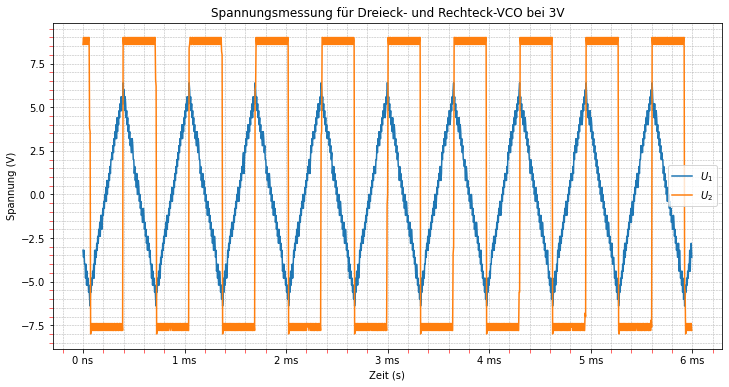

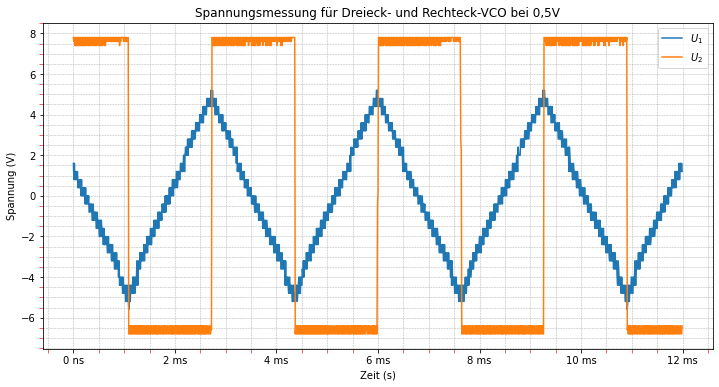

In [47]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Implementing the provided helper functions for formatting labels
def format_with_unit(value, unit):
    """Format a number and append a unit, removing trailing zeros."""
    formatted_value = '{:1.2f}'.format(value).rstrip('0').rstrip('.')
    return formatted_value + ' ' + unit if formatted_value != '' else '0 ' + unit

def format_freq(x, pos):
    """Format frequency axis with SI unit prefixes."""
    if x >= 1e9:
        return format_with_unit(x * 1e-9, 'G')
    elif x >= 1e6:
        return format_with_unit(x * 1e-6, 'M')
    elif x >= 1e3:
        return format_with_unit(x * 1e-3, 'k')
    else:
        return format_with_unit(x, '')

def format_phase(x, pos):
    """Add degree symbol to phase axis."""
    return '{:1.0f}\u00B0'.format(x)  # \u00B0 is the unicode for degree symbol

def format_time(x, pos):
    """Format time axis with SI unit prefixes."""
    if x >= 1:
        return format_with_unit(x, 's')
    elif x >= 1e-3:
        return format_with_unit(x * 1e3, 'ms')
    elif x >= 1e-6:
        return format_with_unit(x * 1e6, 'µs')
    else:
        return format_with_unit(x * 1e9, 'ns')

def plot_vco_voltage(data, title, filename, legendnames):
    data_cleaned = data.iloc[1:].copy()  # Skipping the first row with meta information
    data_cleaned['CH1'] = pd.to_numeric(data_cleaned['CH1'], errors='coerce')
    data_cleaned['CH2'] = pd.to_numeric(data_cleaned['CH2'], errors='coerce')
    sampling_interval = data["Increment"][0]
    total_samples = data_cleaned.shape[0]
    time = np.arange(0, total_samples * sampling_interval, sampling_interval)[:total_samples]
    plt.figure(figsize=(12, 6))
    plt.plot(time, data_cleaned['CH1'], label=legendnames[0])
    plt.plot(time, data_cleaned['CH2'], label=legendnames[1])
    plt.xlabel('Zeit (s)')
    plt.ylabel('Spannung (V)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))
    plt.savefig(filename)
    plt.show()

directory_path = '.'
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

for file in csv_files:
    voltage_value = file.split('_')[1].replace('V.csv', '')  # Extracting voltage value and ignoring 1_
    data = pd.read_csv(os.path.join(directory_path, file))
    title = f'Spannungsmessung für Dreieck- und Rechteck-VCO bei {voltage_value}V'
    filename = os.path.splitext(file)[0].replace('1_', '') + '_vco_plot.pdf'  # Improved filename formatting
    legendnames = ['$U_1$', '$U_2$']
    plot_vco_voltage(data, title, filename, legendnames)


In [37]:
def find_square_wave_frequency_improved(time, signal):
    """
    An improved function to calculate the frequency of a square wave signal.
    This approach uses zero-crossing detection to identify full cycles.
    """
    # Identify zero-crossings (where the signal changes sign) as potential cycle boundaries
    zero_crossings = np.where(np.diff(np.sign(signal)))[0]
    
    # Filter out zero-crossings to ensure we're only considering those that represent full cycles
    # This simple approach assumes a relatively clean square wave without noise-induced spurious crossings
    if len(zero_crossings) > 2:
        # Calculate time differences between successive zero crossings
        time_diffs = np.diff(time[zero_crossings])

        # Average time difference * 2 gives the period (assuming a full cycle between zero crossings)
        average_period = np.mean(time_diffs) * 2

        # Frequency is the inverse of the period
        frequency = 1 / average_period if average_period > 0 else 0
    else:
        frequency = 0  # Default to 0 if not enough crossings are detected
    
    return frequency

# Recalculate the frequency for the 0.5V CH2 signal with the improved function
# Re-calculating the frequencies for all files using the improved frequency calculation method
frequency_results_improved = {}

for file in csv_files:
    voltage_value = file.split('_')[1].replace('V.csv', '')  # Extracting voltage value
    data = pd.read_csv(os.path.join(directory_path, file))
    data_cleaned = data.iloc[1:].copy()  # Skipping the first row with meta information
    data_cleaned['CH1'] = pd.to_numeric(data_cleaned['CH1'], errors='coerce')
    data_cleaned['CH2'] = pd.to_numeric(data_cleaned['CH2'], errors='coerce')
    sampling_interval = data["Increment"][0]
    total_samples = data_cleaned.shape[0]
    time = np.arange(0, total_samples * sampling_interval, sampling_interval)[:total_samples]

    frequency_ch2_improved = find_square_wave_frequency_improved(time, data_cleaned['CH2'].values)
    frequency_results_improved[voltage_value] = frequency_ch2_improved

frequency_results_improved


{'3,5': 1826.086956521739,
 '5': 1801.0291595197255,
 '2,5': 1412.4293785310733,
 '1': 626.0434056761269,
 '1,5': 843.1703204047216,
 '4,5': 1903.114186851211,
 '4': 2021.0896309314587,
 '2': 1088.9292196007257,
 '3': 1623.9316239316238,
 '0,5': 305.4989816700611}

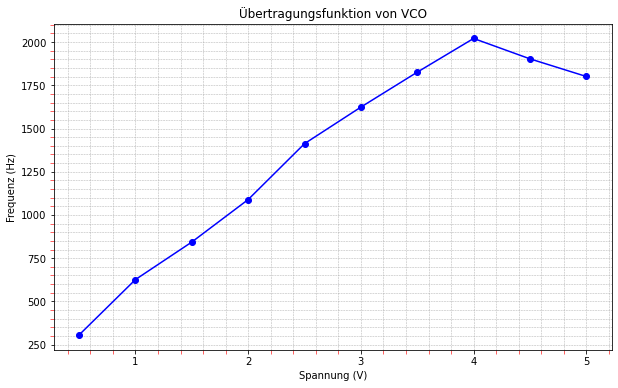

In [48]:
voltages = [float(v.replace(',', '.')) for v in frequency_results_improved.keys()]
frequencies = list(frequency_results_improved.values())
# Sort the frequencies by voltage before plotting
sorted_indices = np.argsort(voltages)
sorted_voltages = np.array(voltages)[sorted_indices]
sorted_frequencies = np.array(frequencies)[sorted_indices]

# Plotting the sorted frequencies
plt.figure(figsize=(10, 6))
plt.plot(sorted_voltages, sorted_frequencies, marker='o', linestyle='-', color='b')
plt.title('Übertragungsfunktion von VCO')
plt.xlabel('Spannung (V)')
plt.ylabel('Frequenz (Hz)')
plt.grid(True)
plt.savefig("uebertragugsplot.pdf")
plt.show()
